<a href="https://colab.research.google.com/github/cristiangcev/Optimizing-Employee-Performance-Well-being/blob/main/02_exploratory_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Phase 2: Exploratory Data Analysis (EDA)

This phase involves a deep dive into the dataset's characteristics, using visualizations and summary statistics to uncover initial patterns.


---



* **Descriptive Statistics**:
    * Generate summary statistics (.describe()) for all numerical columns.
    * Obtain frequency counts (.value_counts()) for all categorical variables.
* **Distribution Analysis**:
    * Visualize the distributions of key numerical variables (Salary, EmpSatisfaction, EngagementSurvey, Absences) using Histograms, Box Plots, and Density Plots.
* **Relationship Exploration**:
    * **Bivariate Analysis**:
        * Numerical vs. Numerical: Create scatter plots (e.g., EngagementSurvey vs. EmpSatisfaction) and calculate correlation coefficients.
        * Categorical vs. Numerical: Utilize Box Plots or Violin Plots (e.g., EmpSatisfaction by Department).
    * **Multivariate Analysis**: Generate a correlation heatmap of all numerical features.
* **Identify Initial Insights**:
    * Document any strong correlations, unexpected distributions, or nascent trends observed.


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Load the cleaned data for visualizations
df_eda = pd.read_feather('hr_data_cleaned.feather')

##Analysis: Employee Satisfaction Overall
####It appears that most employees are satisfied. However, we will now inspect whether employee satisfaction varies across department. We will do this using a boxplot.

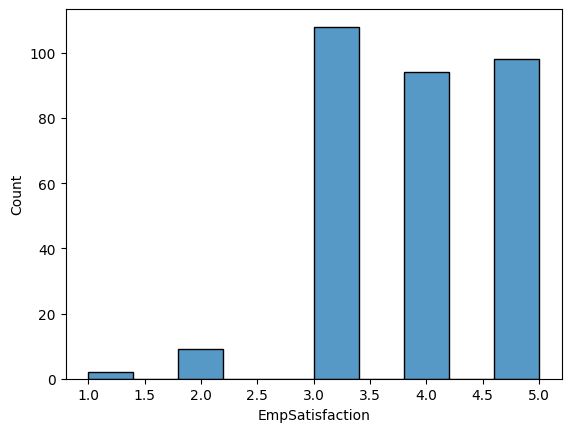

In [4]:
 # Create a histogram for the EmpSatisfaction variable to get an overall comparison of employee satisfaction levels.
 sns.histplot(data=df_eda, x='EmpSatisfaction')
 plt.show()

##Analysis: Employee Satisfaction vs. Department
####Satisfaction varies by department, with specific problem areas in Production and Sales.


---


**Production** and **Sales** have long tails below them extending to 1. The median is the same for **Sales**, **IT**, **Production**, and **Software Engineering**. The long lower "whiskers" for these departments tell us that while the median employee might be happy, there's a significant group of very unsatisfied people pulling the range down.

However, the Admin Offices have a much smaller box with a tail extending above it to 5 and below it to 2.The smaller box means there is less variance in satisfaction scores—most people feel similarly.

 **Executive Office** has an almost unreadable box plot, presumably because of the small number of executives, however it is at 3. It appears that although satisfaction seems mostly even across the board, **Production** and **Sales** have some individuals who are very unsatisfied while the admin office has a slightly lower average score. **Executive Office** has the lowest average at 3.

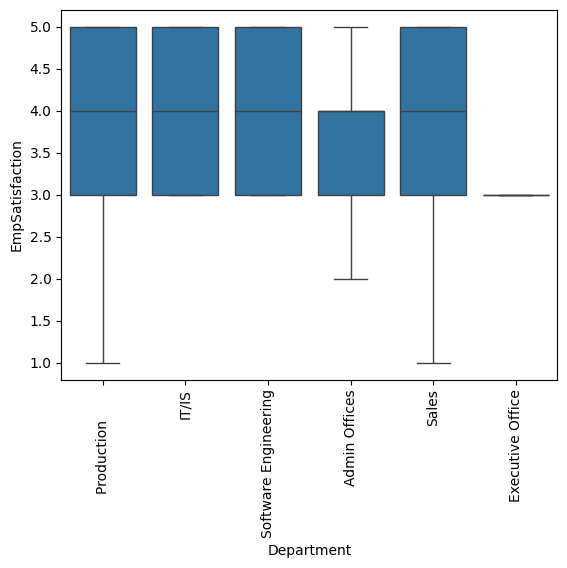

In [5]:
# Create a boxplot comparing department categories to Employee Satisfaction
sns.boxplot(data=df_eda, x='Department', y='EmpSatisfaction')
# Rotate department names to improve readability
plt.xticks(rotation=90)
plt.show()

## Analysis: Employee Satisfaction vs. Salary
#### Employee satisfaction is approximately equal across salaries with one exception. The only employees below satisfied are those making less than 90k. The only employees who are very unsatisfied make less than 65k. This suggests that while a high salary may not guarantee happiness, a low salary might be a significant factor for unhappiness.

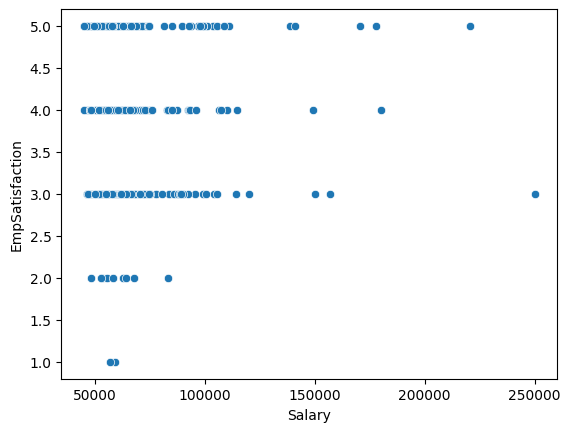

In [6]:
# Create a scatter plot comparing 'Salary' on the x-axis and Employee Satisfaction on the y-axis.
sns.scatterplot(data=df_eda, x='Salary', y='EmpSatisfaction')

plt.show()

##Analysis: Salary vs. Position
#### In general, tech roles seem to have a higher variance in salary than roles in other areas. Administrative assistants have the lowest average salary.

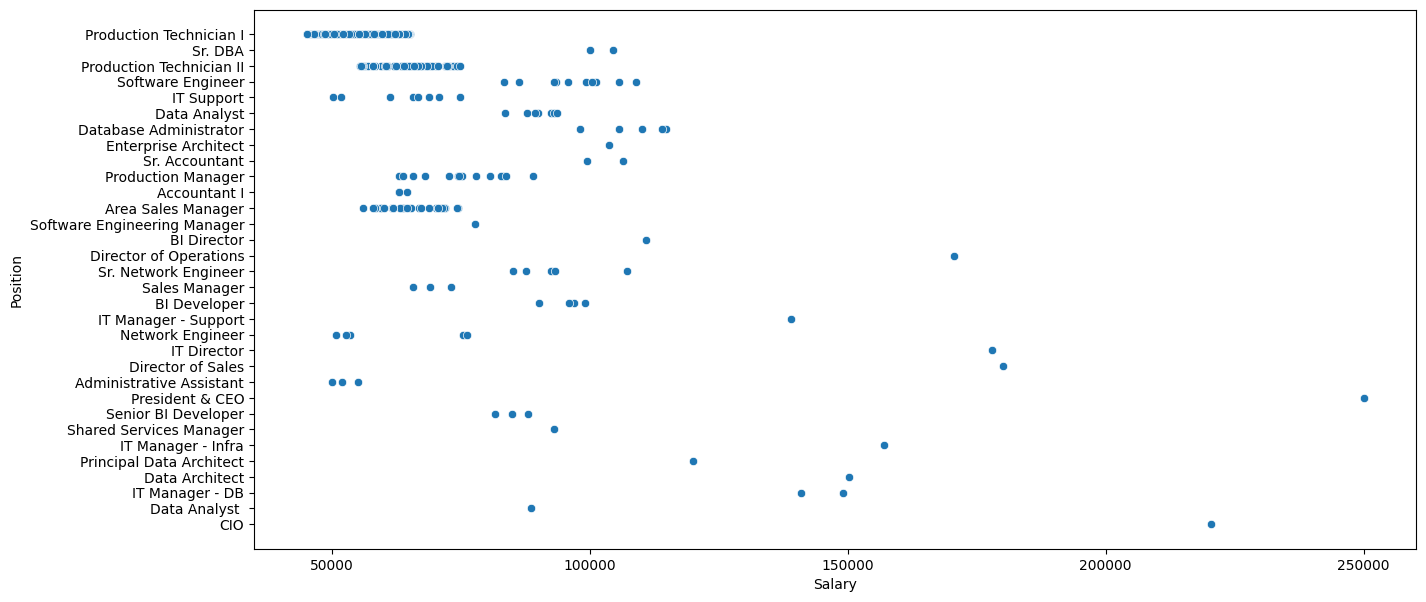

In [7]:
plt.figure(figsize=(15, 7))
sns.scatterplot(data=df_eda, x='Salary', y='Position')

plt.show()

##Analysis: General Statistics
####  The mean salary of the company is 69,000. The mean employee satisfaction is 3.9. The mean engagement is 4.1. The mean absences are 10.2. 75% of employees make less than 72,000.

In [8]:
df_eda.describe()

,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,...,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,Tenure,Age,High_Absence_Flag
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,...,311.000000,311.000000,311.000000,311.000000,311,311.000000,311.000000,311.000000,311.000000,311.000000
mean,10156.000000,0.398714,0.810289,0.434084,2.392283,4.610932,2.977492,0.093248,69020.684887,0.334405,...,14.196141,4.110000,3.890675,1.218650,2017-09-10 21:17:56.527331072,0.414791,10.237942,9.002881,17.076556,0.286174
min,10001.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,45046.000000,0.000000,...,0.000000,1.120000,1.000000,0.000000,2010-07-14 00:00:00,0.000000,1.000000,0.071184,-49.533196,0.000000
25%,10078.500000,0.000000,0.000000,0.000000,1.000000,5.000000,3.000000,0.000000,55501.500000,0.000000,...,9.500000,3.690000,3.000000,0.000000,2016-03-19 12:00:00,0.000000,5.000000,4.962355,-35.110198,0.000000
50%,10156.000000,0.000000,1.000000,0.000000,1.000000,5.000000,3.000000,0.000000,62810.000000,0.000000,...,14.000000,4.280000,4.000000,0.000000,2019-01-16 00:00:00,0.000000,10.000000,10.579055,38.587269,0.000000
75%,10233.500000,1.000000,1.000000,1.000000,5.000000,5.000000,3.000000,0.000000,72036.000000,1.000000,...,19.000000,4.700000,5.000000,0.000000,2019-02-04 00:00:00,0.000000,15.000000,11.920602,43.581109,1.000000
max,10311.000000,1.000000,4.000000,1.000000,5.000000,6.000000,4.000000,1.000000,250000.000000,1.000000,...,39.000000,5.000000,5.000000,8.000000,2019-02-28 00:00:00,6.000000,20.000000,19.414100,50.250513,1.000000
std,89.922189,0.490423,0.943239,0.496435,1.794383,1.083487,0.587072,0.291248,25156.636930,0.472542,...,8.301386,0.789938,0.909241,2.349421,NaN,1.294519,5.852596,4.399286,38.587424,0.452700


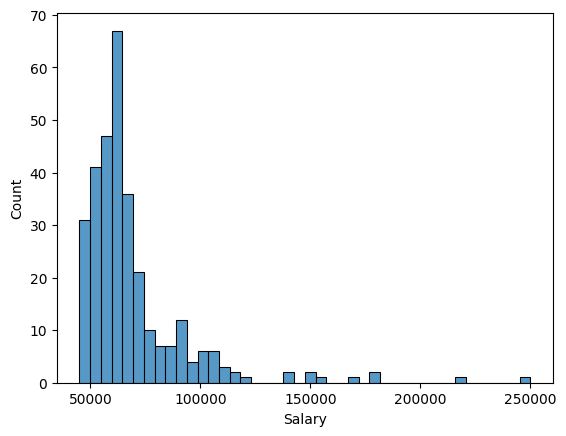

In [10]:
sns.histplot(data=df_eda, x='Salary')
plt.show()

##Analysis: Absences by Department and Position
#### Absences as a whole seem uniformly distributed across employees. However, across department, Admin Offices have the lowest median and mean absences, while sales have the highest. In general, most employees fall between 7.5 and 15 absences.

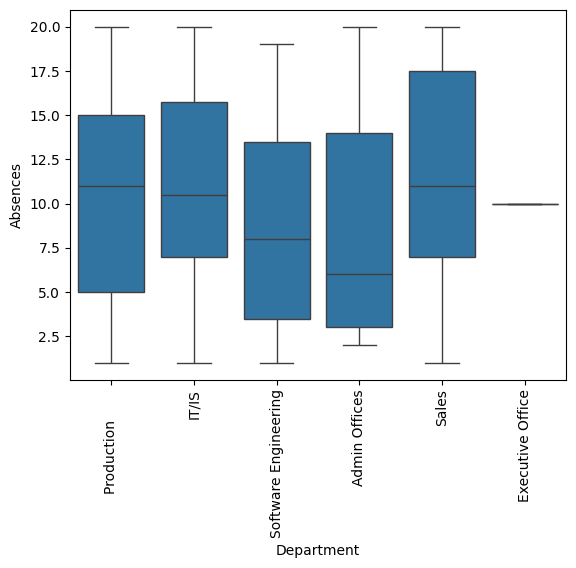

In [18]:
sns.boxplot(data=df_eda, x='Department', y='Absences')
plt.xticks(rotation=90)
plt.show()

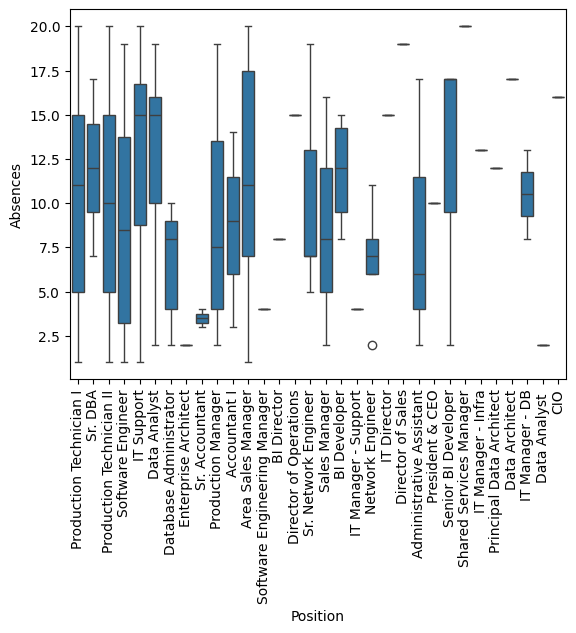

In [19]:
sns.boxplot(data=df_eda, x='Position', y='Absences')
plt.xticks(rotation=90)
plt.show()